In [1]:
import tensorflow as tf
hello = tf.constant('Hello, Tensorflow!')
sess = tf.Session()
print(sess.run(hello))

/home/ginchoeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, Tensorflow!'


step:1,w:-0.47862881422042847,b:9.861495018005371


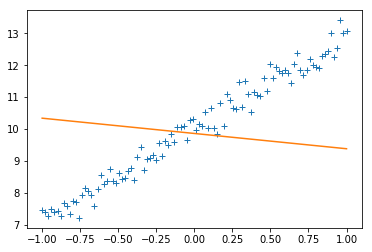

step:2,w:0.9276153445243835,b:10.577278137207031


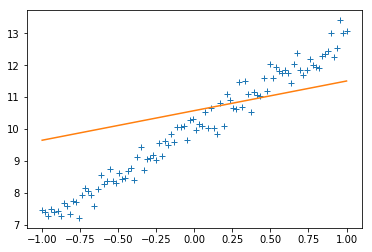

step:3,w:1.8566771745681763,b:10.383610725402832


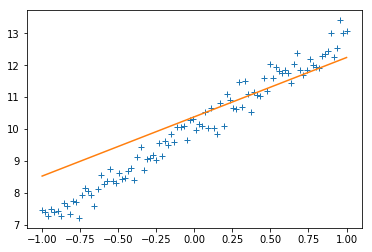

step:4,w:2.3568613529205322,b:10.21279239654541


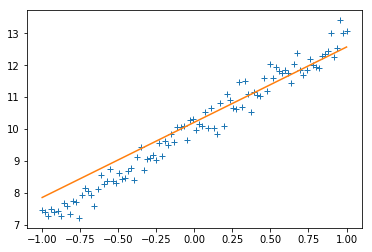

step:5,w:2.614802598953247,b:10.116551399230957


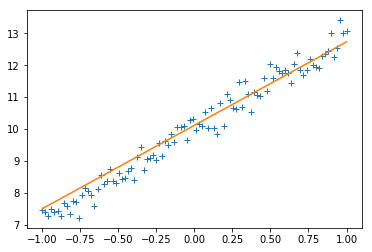

step:6,w:2.7464330196380615,b:10.06639289855957


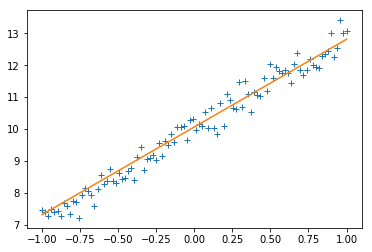

step:7,w:2.8134267330169678,b:10.040732383728027


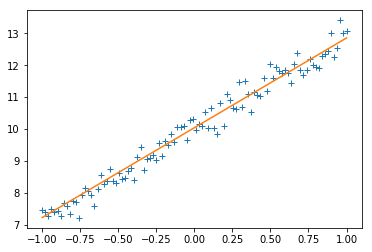

step:8,w:2.8475022315979004,b:10.027660369873047


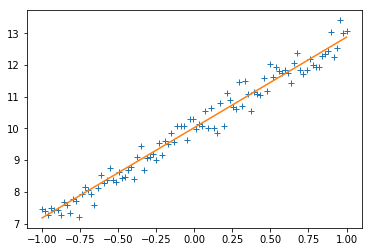

step:9,w:2.8648300170898438,b:10.02100944519043


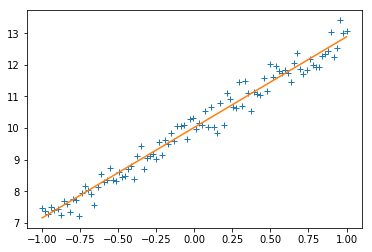

step:10,w:2.873641014099121,b:10.017631530761719


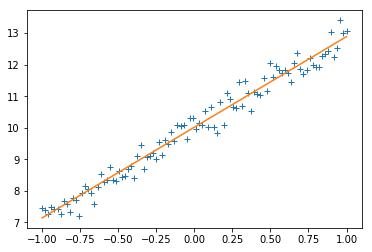

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#定义训练数据
train_x = np.linspace(-1,1,100)
train_y = 3*train_x + np.random.randn(*train_x.shape)*0.33 + 10

#定义输入输出
x = tf.placeholder(dtype=tf.float32)
y_ = tf.placeholder(dtype=tf.float32)

#定义权值和偏置
w = tf.Variable(0.0,name="weight")
b = tf.Variable(0.0,name="bias")

#定义预测输出
y = w*x + b

#定义损失函数和反向传播算法
loss = tf.square(y-y_)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

#创建会话
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    for i in range(10):
        for (X,Y) in zip(train_x,train_y):
            _,w_value,b_value = sess.run([train_step,w,b],feed_dict={x:X,y_:Y})
        print("step:{},w:{},b:{}".format(i+1,w_value,b_value))
        #绘图
        plt.plot(train_x,train_y,'+')
        plt.plot(train_x,w.eval()*train_x+b.eval())
        plt.show()